In [4]:
#!pip install pandas-profiling --user

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pandas_profiling import ProfileReport
%matplotlib inline

In [6]:
df = pd.read_csv("D:\\lh_data\\ineuron\\Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
pf = ProfileReport(df)
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
pf.to_file("test.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
# selecting one feature
x = df[["TV"]]   # linear regression expects a 2D array
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [25]:
y = df.Sales
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [26]:
# import linear regression library
from sklearn.linear_model import LinearRegression

In [28]:
print(x.shape, y.shape)

(200, 1) (200,)


In [29]:
linear=LinearRegression()  #
linear.fit(x,y)   # e

LinearRegression()

In [30]:
linear.intercept_

7.032593549127695

In [31]:
linear.coef_

array([0.04753664])

In [41]:
file = "linear1_reg.sav"              # filename
pickle.dump(linear,open(file,"wb") )   # dump the linear instance into a binary file
# note you can use OLS(statmodels) to get summaries but you can not save the file, for that case you need the sklearn

In [38]:
linear.predict([[94]])

array([11.50103775])

In [35]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## R^2

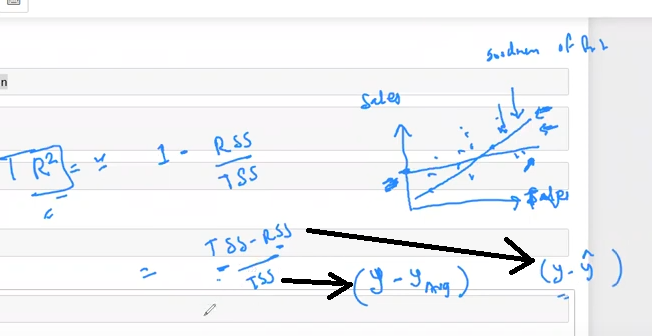

### $R^2$ statistics

The R-squared statistic provides a measure of fit. It takes the form of a proportion—the proportion of variance
explained—and so it always takes on a value between 0 and 1. 
In simple words, it represents how much of our data is being explained by our model. 
For example,  $R^2$ statistic = 0.75, it says that our model fits 75 % of the total data set.
Similarly, if it is 0, it means none of the data points is being explained and a value of 1 represents 100% data explanation.
Mathematically $R^2$ statistic is calculated as :

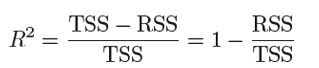
                                              
Where RSS:  is  the Residual Sum of squares and is given as :

<img src="RSS.PNG">
                                                                
RSS is the residual(error) term we have been talking about so far.
And, TSS:  is  the Total sum of squares and given as :

<img src="TSS.PNG">
                                                             
TSS is calculated when we consider the line passing through the mean value of y, to be the best fit line.
Just like RSS, we calculate the error term when the best fit line is the line passing through the mean value of y and we get the value of TSS.

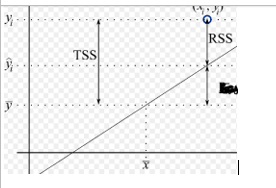
    
The closer the value of $R^2$ is to 1 the better the model fits our data. If $R^2$ comes below 0(which is a possibility) that means the model is so bad that it is performing even worse than the average best fit line.


### Adjusted $R^2$ statistics
As we increase the number of independent variables in our equation, the $R^2$ increases as well. But that doesn’t mean that the new independent variables have any correlation with the output variable. In other words, even with the addition of new features in our model, it is not necessary that our model will yield better results but $R^2$ value will increase. To rectify this problem, we use Adjusted $R^2$ value which penalises excessive use of such features which do not correlate with the output data.
Let’s understand this with an example:
<img src="adjr.PNG" width="300">

We can see that $R^2$ always increases with an increase in the number of independent variables.
Thus, it doesn’t give a better picture and so we need Adjusted $R^2$ value to keep this in check.
Mathematically, it is calculated as:

 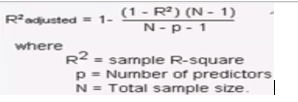
In the equation above, when p = 0, we can see that adjusted $R^2$ becomes equal to $R^2$.
Thus, adjusted $R^2$  will always be less than or equal to $R^2$, and it penalises the excess of independent variables which do not affect the dependent variable.


# example

In [40]:
l=[4,5,6,7,89,34,45,67,23]
for i in l:
    print(f"i:{i}, Prediction:{linear.predict([[i]])}")

i:4, Prediction:[7.22274011]
i:5, Prediction:[7.27027675]
i:6, Prediction:[7.31781339]
i:7, Prediction:[7.36535003]
i:89, Prediction:[11.26335455]
i:34, Prediction:[8.64883932]
i:45, Prediction:[9.17174237]
i:67, Prediction:[10.21754846]
i:23, Prediction:[8.12593628]


# OLS ORDINAR LEASE SQUARE - LIBRARY FROM STATSMODELS

In [44]:
import statsmodels.formula.api as smf

In [45]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [47]:
lm = smf.ols(formula="Sales ~ TV ", data=df).fit()
print(lm.conf_int())
lm.summary()

                  0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        20:54:52   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
lm2 = smf.ols(formula="Sales ~ TV + Newspaper ", data=df).fit()
print(lm2.conf_int())
lm2.summary()

                  0         1
Intercept  4.738940  6.810956
TV         0.041812  0.051991
Newspaper  0.024155  0.064284


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           3.95e-45
Time:                        20:57:26   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
lm3 = smf.ols(formula="Sales ~ TV + Radio + Newspaper ", data=df).fit()
print(lm3.conf_int())
lm3.summary()

                  0         1
Intercept  2.323762  3.554016
TV         0.043014  0.048516
Radio      0.171547  0.205513
Newspaper -0.012616  0.010541


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        20:58:45   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multi- Collinearity

**Origin of the word:** The word multi-collinearity consists of two words:Multi, meaning multiple, and Collinear, meaning being linearly dependent on each other. 

For e.g.,
		Let’s consider this equation
		$ a+b=1  => b=1-a $
        
It means that ‘b’ can be represented in terms of ‘a’ i.e., if the value of ‘a’ 		changes, automatically the value of ‘b’ will also change. This equation 		denotes a simple linear relationship among two variables.

**Definition:** The purpose of executing a Linear Regression is to predict the value of a 	dependent variable based on certain independent variables.

So, when we perform a Linear Regression, we want our dataset to have variables which are independent i.e., we should not be able to define an 	independent variable with the help of another independent variable  	because now in our model we have two variables which can be defined based 	on a certain set of independent variables which defeats the entire purpose.

* Multi-collinearity is the statistical term to represent this type of a relation amongst the independent variable- when the independent variables are not so independent😊.
* We can define multi-collinearity as the situation where the independent variables (or the predictors) have strong correlation amongst themselves.

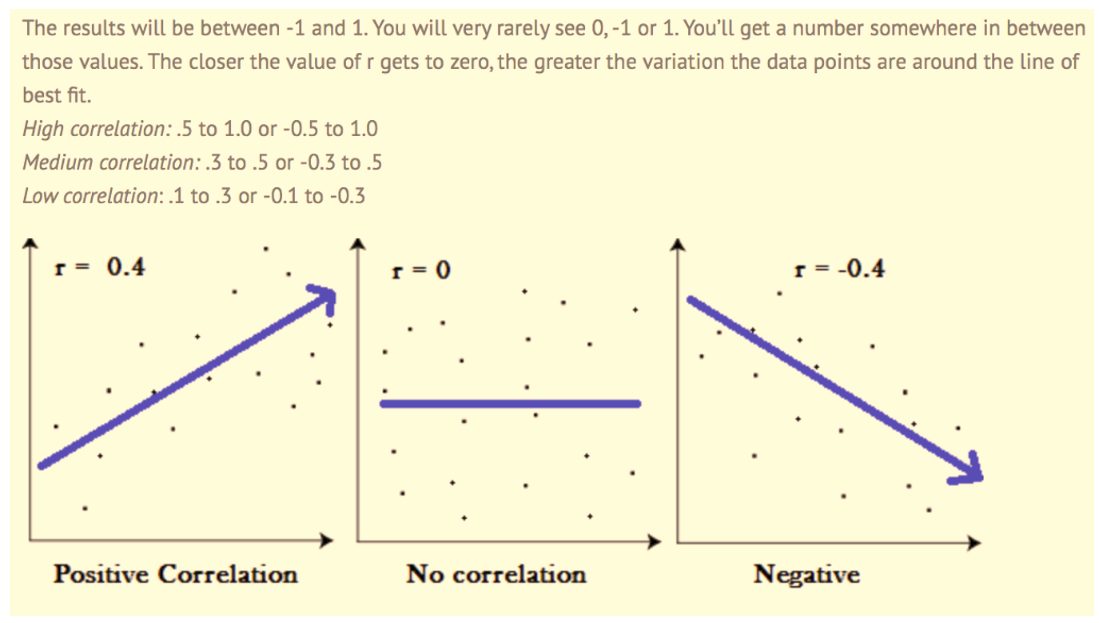

The mathematical flow for multicollinearity can be shown as:
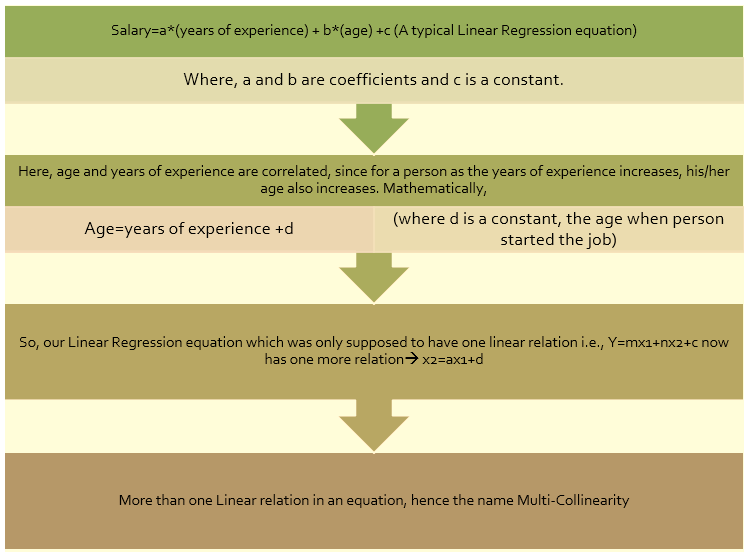

#### Why Should We Care About Multi-Collinearity?
* The coefficients in a Linear Regression model represent the extent of change in Y when a certain x (amongst X1,X2,X3…) is changed keeping others constant. But, if x1 and x2 are dependent, then this assumption itself is wrong that we are changing one variable keeping others constant as the dependent variable will also be changed. It means that our model itself becomes a bit flawed.
* We have a redundancy in our model as two variables (or more than two) are trying to convey the same information.
* As the extent of the collinearity increases, there is a chance that we might produce an overfitted model. An overfitted model works well with the test data but its accuracy fluctuates when exposed to other data sets. 
* Can result in a Dummy Variable Trap.

##### Detection
* __Correlation Matrices and Plots:__ for correlation between all the X variables.
        
        This plot shows the extent of correlation between the independent variable. Generally, a correlation greater than 0.9 or less than -0.9 is to be avoided.
 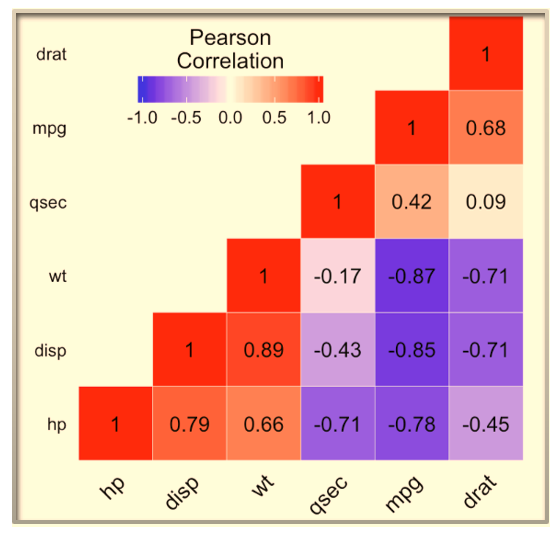
* __Variance Inflation Factor:__ Regression of one X variable against other X variables.

     VIF=$\frac {1}{(1-R squared)}$

            The VIF factor, if greater than 10 shows extreme correlation between the variables and then we need to take care of the correlation.

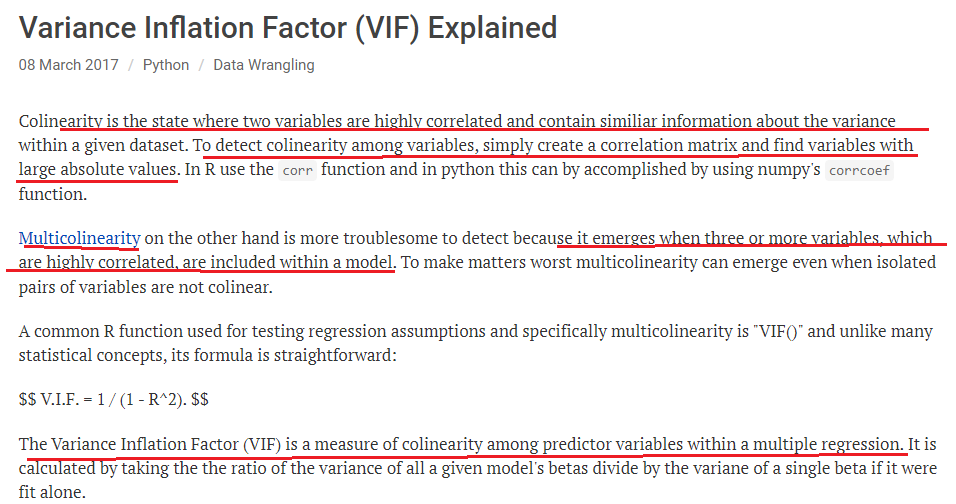

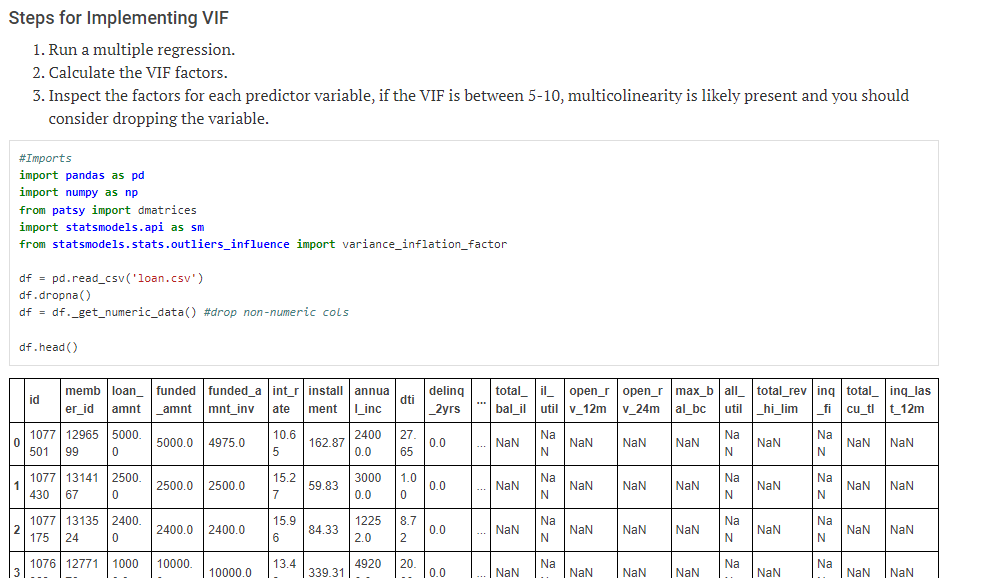

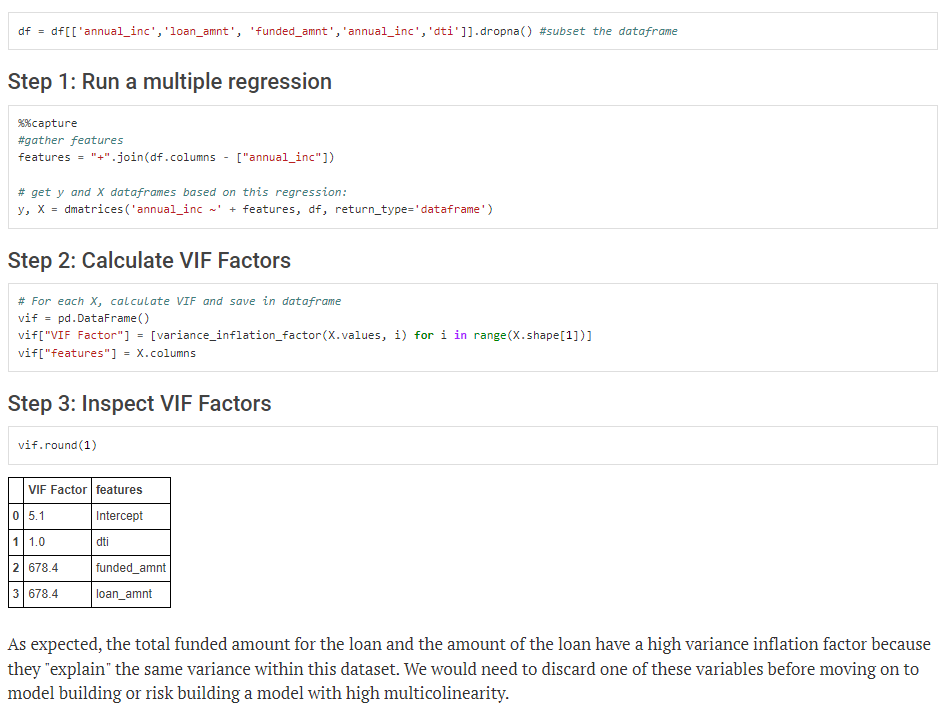

#### Remedies for Multicollinearity

* **Do Nothing:** If the Correlation is not that extreme, we can ignore it. If the correlated variables are not used in solving our business question, they can be ignored.
* **Remove One Variable**: Like in dummy variable trap
* **Combine the correlated variables:** Like creating a seniority score based on Age and Years of experience
* Principal Component Analysis